# MELBOURNE PARKING DATA ANALYTICS

## 1.0 DATA PRE PROCESSING


### 1.1 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parkingDB = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")


### 1.1 Column Modifications

1.1.1 HEADINGS

In [2]:
#renaming code
parkingDB = parkingDB.rename(columns={'Area Name':'Area', 'Street Name':'Street', 'Duration of Parking Event (in seconds)':'Parking Duration (s)', 'Between Street 1':'Street Limit 1','Between Street 2':'Street Limit 2', 'In Violation?': 'Violation' })

#explanation
print("\u0332".join("Renamed Columns"))
print("Area Name --> Area")
print("Street Name --> Street")
print("Duration of Parking Event (in seconds) --> Parking Duration (s)")
print("Between Street 1 --> Street Limit 1")
print("Between Street 2 --> Street Limit 2")
print("In Violation? --> Violation")
print("\nnote: all other column names remained constant")

R̲e̲n̲a̲m̲e̲d̲ ̲C̲o̲l̲u̲m̲n̲s
Area Name --> Area
Street Name --> Street
Duration of Parking Event (in seconds) --> Parking Duration (s)
Between Street 1 --> Street Limit 1
Between Street 2 --> Street Limit 2
In Violation? --> Violation

note: all other column names remained constant


1.1.2 COLUMN DELETION

In [3]:
#Comparing 'Street' to 'Street ID'
print("\u0332".join("Checking Street Entries"))
print('Number of Entries in \'Column Street\': ', parkingDB['Street'].unique().size)
print('Number of Entries in \'Street ID\':  ', parkingDB['Street ID'].unique().size)
print("\nThe number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.")
print("\nBoth entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.")

C̲h̲e̲c̲k̲i̲n̲g̲ ̲S̲t̲r̲e̲e̲t̲ ̲E̲n̲t̲r̲i̲e̲s
Number of Entries in 'Column Street':  75
Number of Entries in 'Street ID':   75

The number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.

Both entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.


1.1.3 UNIQUE IDENTIFIER CHECK

In [4]:
print("This section will check for unique values in columns of interest, find outliers and possible mistakes. \n")
print('Unique Entries in \'Area\' ', parkingDB['Area'].unique(), '\n')
print('Unique Entries in \'Street\' ', parkingDB['Street'].unique(), '\n')
print('Unique Entries in \'Side of Street\' ', parkingDB['Side Of Street'].unique(), '\n')
print('Unique Entries in \'Device ID\' ', parkingDB['Device ID'].unique().size, '\n')
print('Unique Entries in \'Sign\' ', parkingDB['Sign'].unique().size, '\n')
print("The values for Device ID indicate that the dataset has multiple events for the same car, and so using this to determine rates wtih repeating visits will be useful in the analysis")

This section will check for unique values in columns of interest, find outliers and possible mistakes. 

Unique Entries in 'Area'  ['Banks' 'Chinatown' 'Courtney' 'Princes Theatre' 'Hyatt' 'County' 'RACV'
 'Spencer' 'City Square' 'The Mac' 'Titles' 'Magistrates' 'Rialto'
 'Queensberry' 'Victoria Market' 'Supreme' 'Hardware' 'Regency'
 'Docklands' 'Tavistock' 'Southbank' 'West Melbourne' 'Jolimont'] 

Unique Entries in 'Street'  ['MARKET STREET' 'RUSSELL STREET' 'ELIZABETH STREET' 'EXHIBITION STREET'
 'LONSDALE STREET' 'Lt COLLINS STREET' 'BOURKE STREET' 'FLINDERS LANE'
 'SPRING STREET' 'COLLINS STREET' 'Lt LONSDALE STREET' "A'BECKETT STREET"
 'Lt BOURKE STREET' 'KING STREET' 'ERROL STREET' 'FRANKLIN STREET'
 'Lt DRYBURGH STREET SOUTH' 'WILLIAM STREET' 'WILLS STREET'
 'SPENCER STREET' 'FLINDERS STREET' 'THERRY STREET' 'QUEEN STREET'
 'LEVESON STREET' "O'CONNELL STREET" 'CHETWYND STREET' 'WALSH STREET'
 'ANDERSON STREET' 'ROSSLYN STREET' 'LA TROBE STREET' 'BOND STREET'
 'CAPEL STREET' 'C

1.1.4 NULL ROWS CHECK

In [5]:
print("This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.")
print('Number of Rows Before Row Deletion: ', parkingDB.shape[0])
parkingDB.dropna(axis = 0, thresh = 6, inplace = True)
print('Number of Rows After Row Deletion: ', parkingDB.shape[0])



This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.
Number of Rows Before Row Deletion:  12208178
Number of Rows After Row Deletion:  12208178


In [6]:
print("Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.")
print("\nNull Values Present in Each Column:")
print(parkingDB.isnull().sum())
print("\nThere are no null values within the database after cleaning columns with more than 50% of data missing.")

Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.

Null Values Present in Each Column:
Area                    0
Street                  0
Street Limit 1          0
Street Limit 2          0
Side Of Street          0
Street Marker           0
Arrival Time            0
Departure Time          0
Parking Duration (s)    0
Sign                    0
Violation               0
Street ID               0
Device ID               0
dtype: int64

There are no null values within the database after cleaning columns with more than 50% of data missing.


1.1.5 DATA TRANSFORMATION

In [9]:
print("Convert Arrival Time and Departure Time to Timestamp")
#It takes 20 minutes to run
#parkingDB['Arrival Time'] = pd.to_datetime(parkingDB['Arrival Time'])
#parkingDB['Departure Time'] = pd.to_datetime(parkingDB['Departure Time'])

Convert Arrival Time and Departure Time to Timestamp


In [7]:
parkingDB.to_csv('convertedDB.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parkingDB = pd.read_csv("convertedDB.csv", parse_dates=['Arrival Time','Departure Time'])


In [9]:
parkingDB['Arrival Time']

0          2011-01-10 00:01:10
1          2011-01-10 00:01:11
2          2011-01-10 00:01:11
3          2011-01-10 00:01:13
4          2011-01-10 00:01:14
                   ...        
12208173   2012-09-30 23:47:56
12208174   2012-09-30 23:48:34
12208175   2012-09-30 23:48:41
12208176   2012-09-30 23:49:43
12208177   2012-09-30 23:52:29
Name: Arrival Time, Length: 12208178, dtype: datetime64[ns]

In [10]:
parkingDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12208178 entries, 0 to 12208177
Data columns (total 13 columns):
Area                    object
Street                  object
Street Limit 1          object
Street Limit 2          object
Side Of Street          int64
Street Marker           object
Arrival Time            datetime64[ns]
Departure Time          datetime64[ns]
Parking Duration (s)    int64
Sign                    object
Violation               int64
Street ID               int64
Device ID               int64
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 1.2+ GB


## 2.0 DATA EXPLORATION

### 2.1 NUMBERS OF PAKING EVENTS IN AREAS

Text(0.5, 0, "Count (1000,000's)")

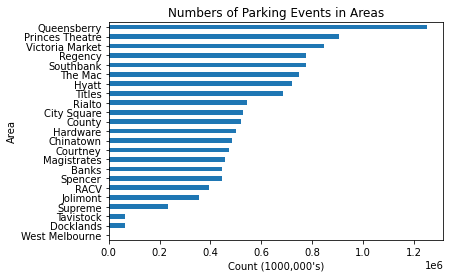

In [7]:
parkingDB['Area'].value_counts().sort_values().plot.barh()
plt.title('Numbers of Parking Events in Areas')
plt.ylabel('Area')
plt.xlabel("Count (1000,000's)")

### 2.2 NUMBERS OF INFRINGEMENTS IN AREAS

Text(0.5, 0, 'Count')

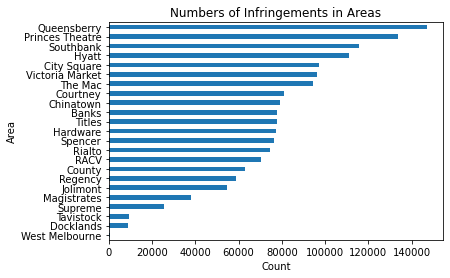

In [6]:
mask_violation = parkingDB['Violation'] == 1
parkingDB.loc[mask_violation, 'Area'].value_counts().sort_values().plot.barh()
plt.title('Numbers of Infringements in Areas')
plt.ylabel('Area')
plt.xlabel("Count")

### 2.3 INFRINGEMENT RATES IN AREAS

Text(0.5, 0, 'Infringement Rate')

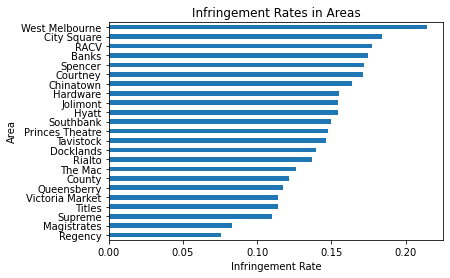

In [9]:
areas = parkingDB['Area'].value_counts()
violations = parkingDB.loc[mask_violation, 'Area'].value_counts()
areas = areas.astype(float)
violations = violations.astype(float)/areas
violations.sort_values().plot.barh()
plt.title('Infringement Rates in Areas')
plt.ylabel('Area')
plt.xlabel("Infringement Rate")

### 2.4 Street vs Number of Violations

Text(0.5, 0, 'Count')

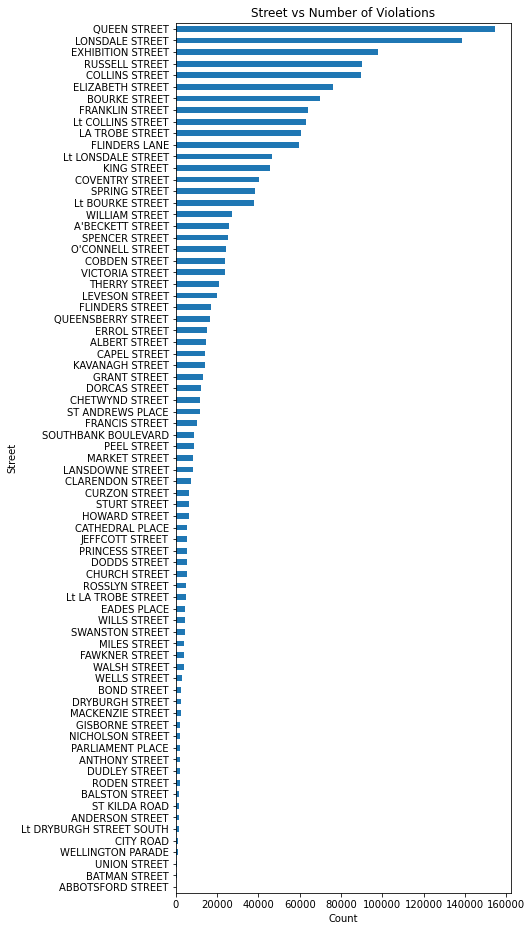

In [10]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Street vs Number of Violations')
plt.ylabel('Street')
plt.xlabel("Count")

### 2.5 Number of Street Signs for each road

Text(0.5, 1.0, 'Number of Street Signs for each road')

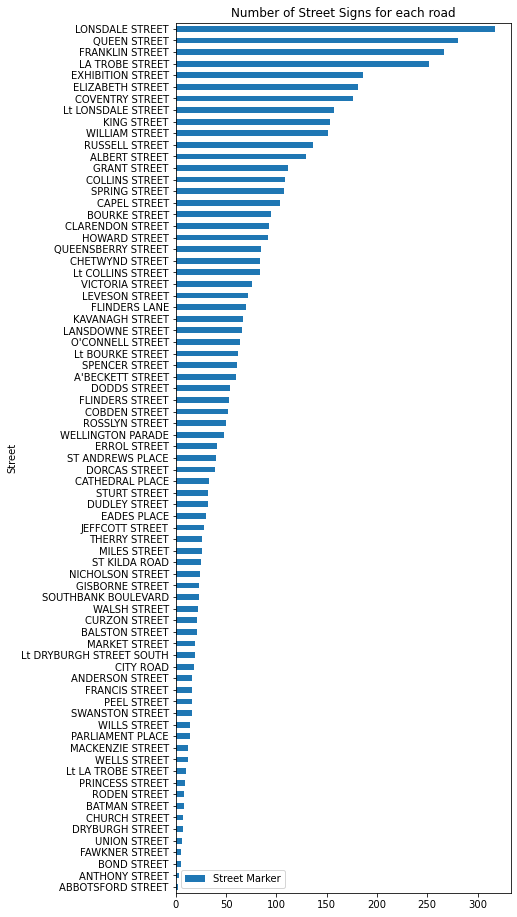

In [12]:
df = parkingDB.groupby('Street')
df = df.agg({'Street Marker':'nunique'}).sort_values(by='Street Marker')
df.plot.barh(figsize=(6, 16))
plt.title('Number of Street Signs for each road')

### 2.6 How many streets are in each area

Text(0.5, 1.0, 'How many streets are in each area')

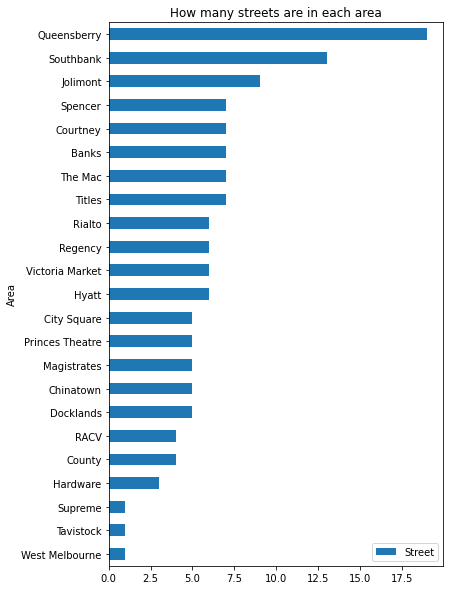

In [13]:
df = parkingDB.groupby('Area')
df = df.agg({'Street':'nunique'}).sort_values(by='Street')
df.plot.barh(figsize=(6, 10))
plt.title('How many streets are in each area')

### 2.7 Number of Violations in each Street

Text(0, 0.5, 'Street')

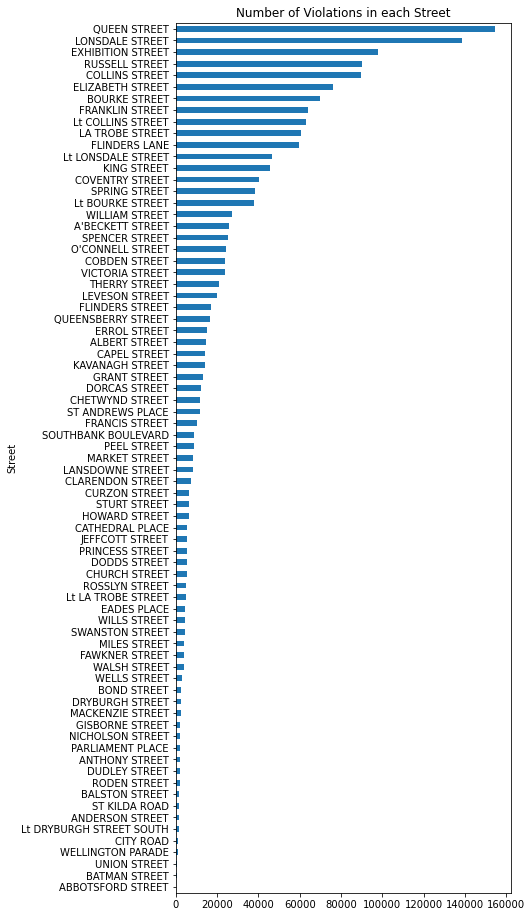

In [14]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Number of Violations in each Street')
plt.ylabel('Street')

### 2.8 Infringement Rate in each Street

Text(0.5, 0, 'Infringement Rate')

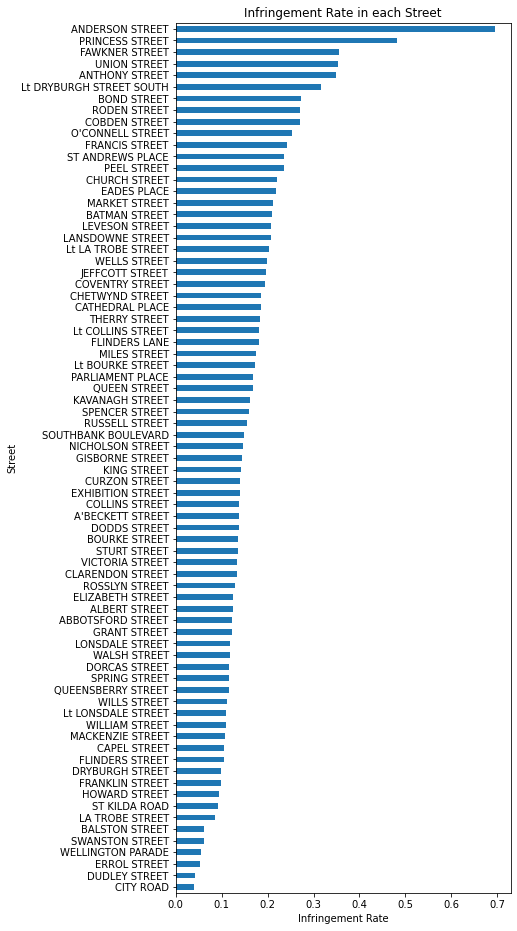

In [9]:
df = parkingDB['Street'].value_counts()
violations = parkingDB.loc[mask_violation, 'Street'].value_counts()
df = df.astype(float)
plt.figure(figsize=(6,16))
violations = violations.astype(float)/df
violations.sort_values().plot.barh()
plt.title('Infringement Rate in each Street')
plt.ylabel('Street')
plt.xlabel("Infringement Rate")

### 2.9 Parking duration vs Violation

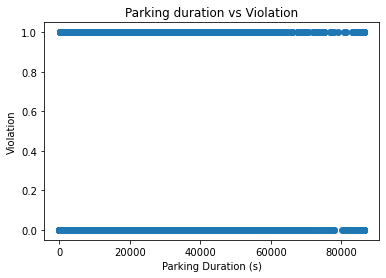

In [3]:
fig, ax = plt.subplots()
ax.scatter(parkingDB['Parking Duration (s)'], parkingDB['Violation'])
plt.title('Parking duration vs Violation')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Violation')
plt.show()

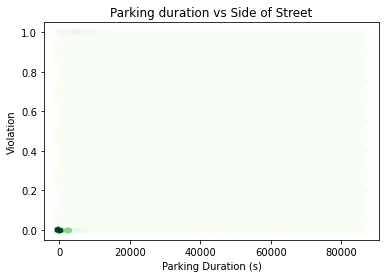

In [14]:
fig, ax = plt.subplots()
ax.hexbin(parkingDB['Parking Duration (s)'], parkingDB['Violation'], gridsize=35, cmap=plt.cm.Greens)
plt.title('Parking duration vs Violation')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Violation')
plt.show()

### 2.10 Parking Duration vs Side of Street

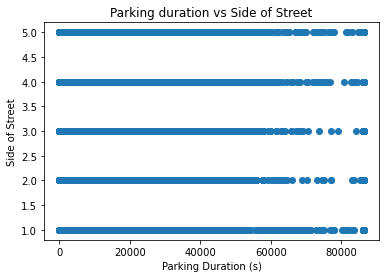

In [4]:
fig, ax = plt.subplots()
ax.scatter(parkingDB['Parking Duration (s)'], parkingDB['Side Of Street'])
plt.title('Parking duration vs Side of Street')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Side of Street')
plt.show()

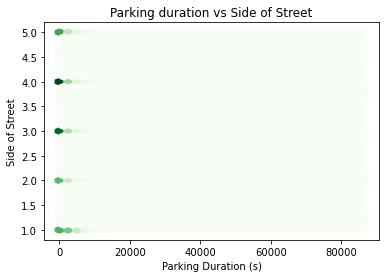

In [13]:
fig, ax = plt.subplots()
ax.hexbin(parkingDB['Parking Duration (s)'], parkingDB['Side Of Street'], gridsize=35, cmap=plt.cm.Greens)
plt.title('Parking duration vs Side of Street')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Side of Street')
plt.show()

### 2.11 Parking duration vs Side of Street with Violation

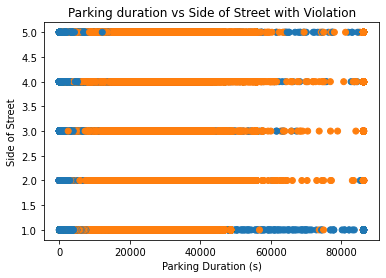

In [3]:
fig, ax = plt.subplots()
colors = {0:'tab:blue', 1:'tab:orange'}
ax.scatter(parkingDB['Parking Duration (s)'], parkingDB['Side Of Street'], c=parkingDB['Violation'].map(colors))
plt.title('Parking duration vs Side of Street with Violation')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Side of Street')
plt.show()

### 2.12 Departure time vs Duration

Text(0, 0.5, 'Parking Duration (s)')

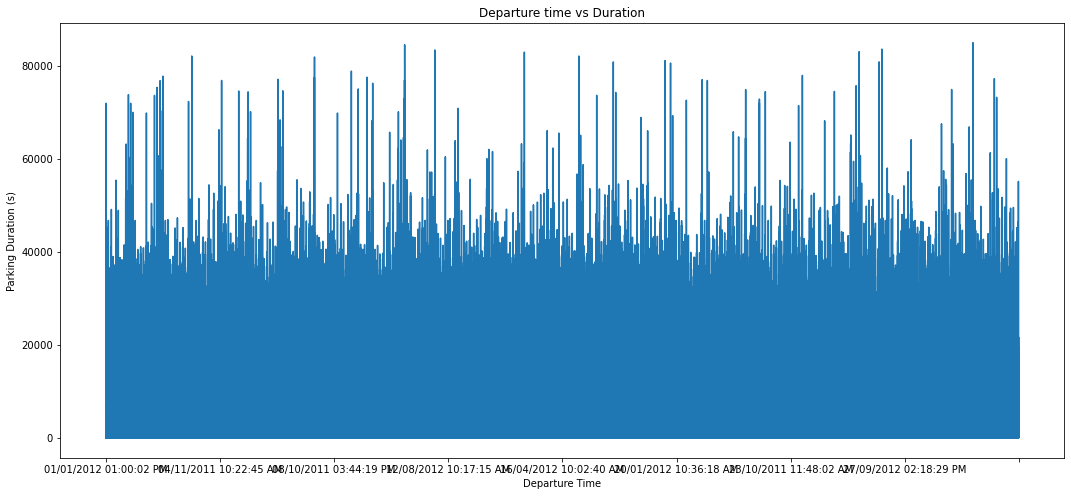

In [8]:
#df = parkingDB.groupby('Departure Time')['Parking Duration (s)'].mean()
#df.plot.line(figsize=(18,8))
#plt.title('Departure time vs Duration')
#plt.ylabel('Parking Duration (s)')

### 2.13 Arrival Time vs Duration

### 2.14 Parking Duration Distribution

Text(0.5, 0, 'Duration (s)')

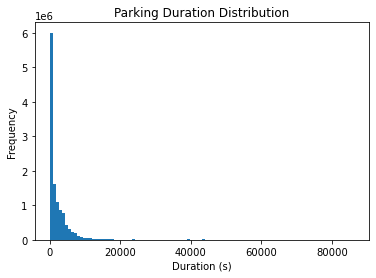

In [15]:
parkingDB['Parking Duration (s)'].plot(kind='hist', bins=100)
plt.title('Parking Duration Distribution')
plt.xlabel('Duration (s)')

### 2.15 Parking Duration Distribution vs Area

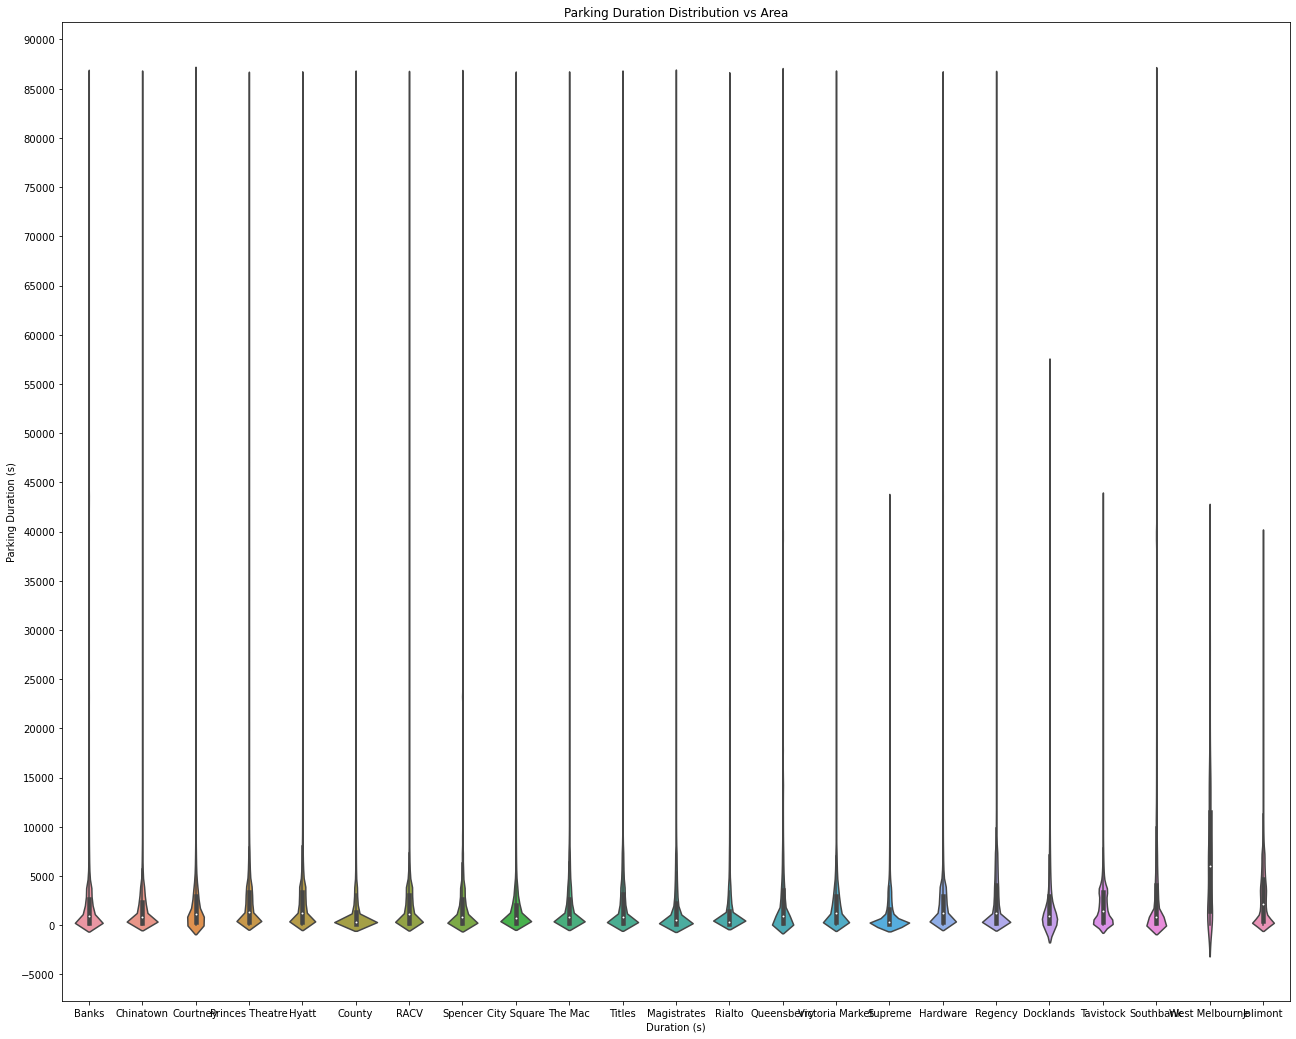

In [6]:
from matplotlib.pyplot import figure
plt.figure(figsize=(22,18))
sns.violinplot(x="Area", y="Parking Duration (s)", data=parkingDB)
#parkingDB.boxplot(figsize=(20, 18), column='Parking Duration (s)', by='Area', grid=True, showmeans=True)
plt.title('Parking Duration Distribution vs Area')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

### 2.16 Parking Duration Distribution vs Violation

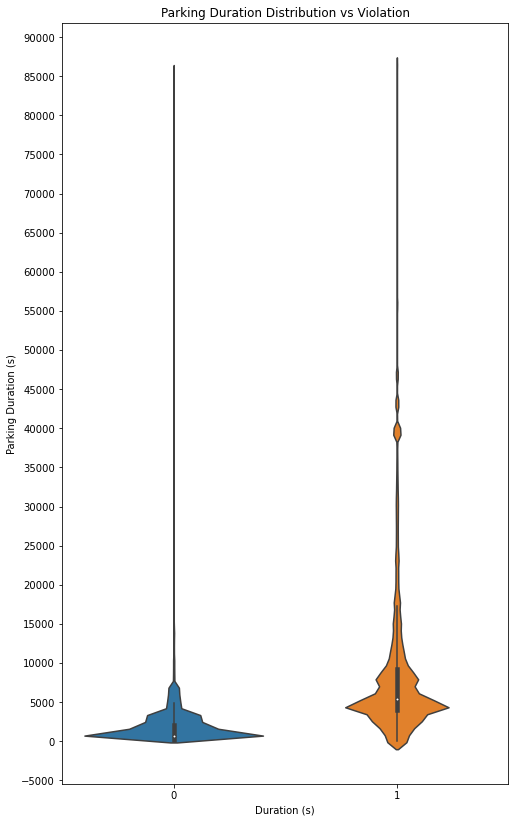

In [7]:
#parkingDB.boxplot(figsize=(8, 14), column='Parking Duration (s)', by='Violation', grid=True, showmeans=True)
plt.figure(figsize=(8,14))
sns.violinplot(x="Violation", y="Parking Duration (s)", data=parkingDB)
plt.title('Parking Duration Distribution vs Violation')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

### 2.17 Number of Unique Device IDs in each Area

Text(0.5, 1.0, 'Number of Unique Device IDs in each Area')

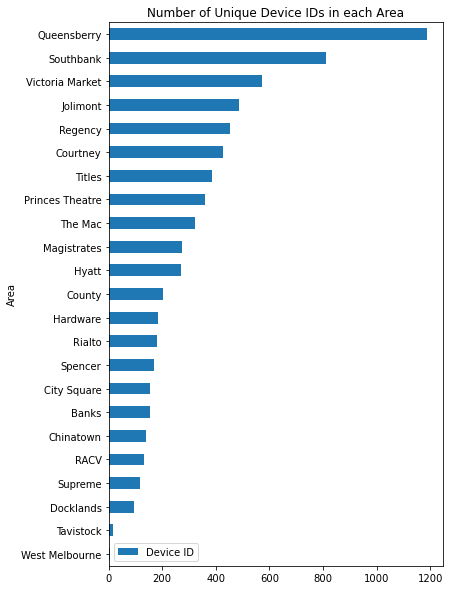

In [11]:
df = parkingDB.groupby('Area')
df = df.agg({'Device ID':'nunique'}).sort_values(by='Device ID')
df.plot.barh(figsize=(6, 10))
plt.title('Number of Unique Device IDs in each Area')

### 2.18 Number of Unique Device IDs in each Street

Text(0.5, 1.0, 'Number of Unique Device IDs in each Street')

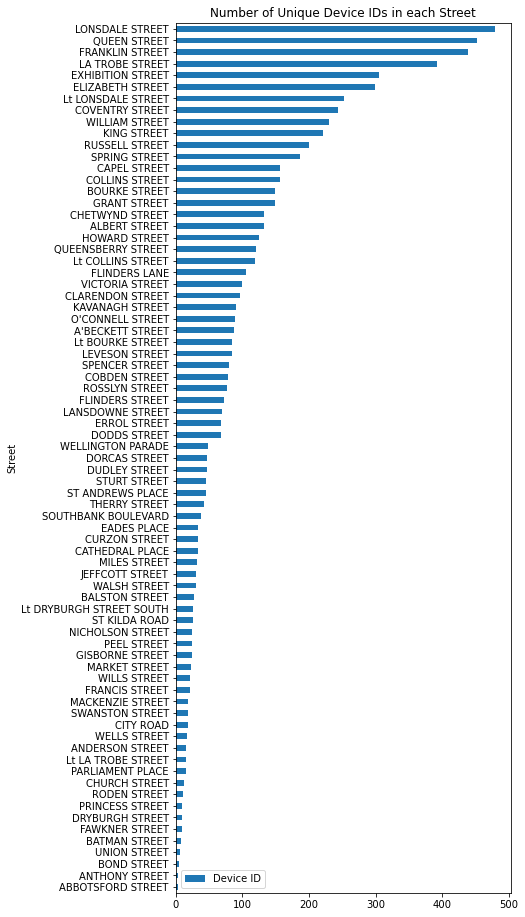

In [14]:
df = parkingDB.groupby('Street')
df = df.agg({'Device ID':'nunique'}).sort_values(by='Device ID')
df.plot.barh(figsize=(6, 16))
plt.title('Number of Unique Device IDs in each Street')

### 2.19 Number of Violations vs Number of Devices

<AxesSubplot:title={'center':'Number of Violations in each Street'}, xlabel='Number of Violations', ylabel='Number of Device IDs'>

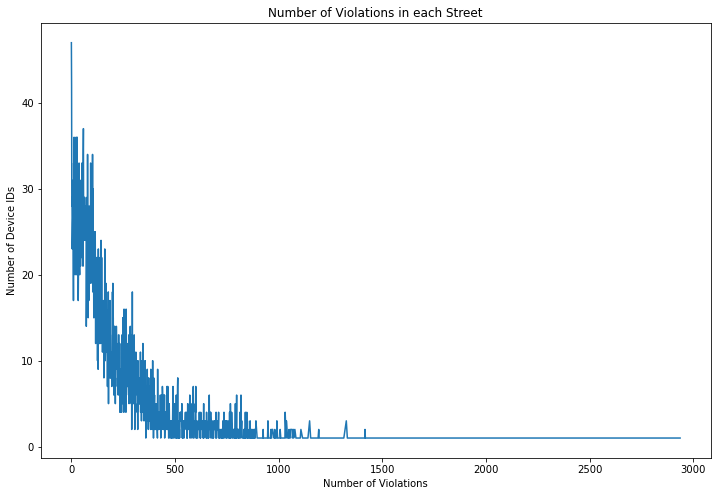

In [34]:
#e.g. There are 47 devices committed 1 violation each, meanwhile there is one device committed 2937 violations.
mask_violation = parkingDB['Violation'] == 1
df = parkingDB.loc[mask_violation, 'Device ID'].value_counts().sort_values()
#parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Number of Violations vs Number of Devices')
plt.ylabel('Number of Device IDs')
plt.xlabel('Number of Violations')
df.value_counts().sort_index().plot.line(figsize=(12,8))

### 2.20 Distribution of Number of Violations for each Device

Text(0, 0.5, 'Number of Violations')

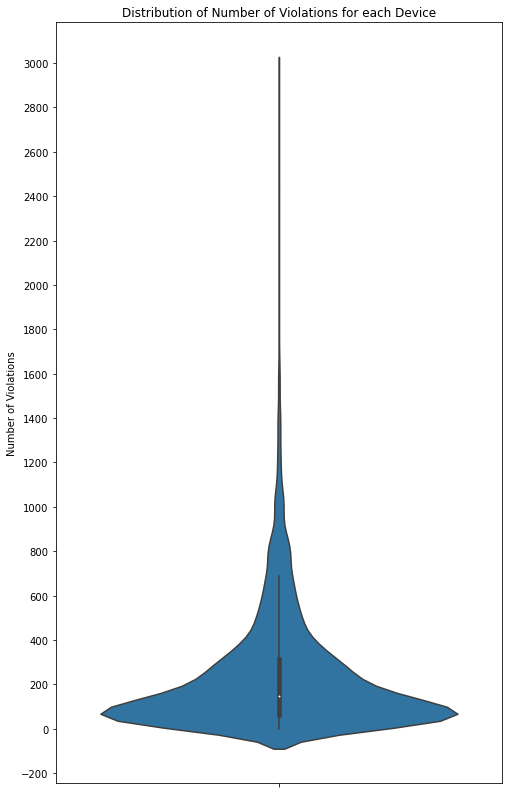

In [10]:
mask_violation = parkingDB['Violation'] == 1
df = parkingDB.loc[mask_violation, 'Device ID'].value_counts()
#df.plot.box(figsize=(8, 14), grid=True, showmeans=True)
plt.figure(figsize=(8,14))
sns.violinplot(y=df, data=df)
plt.locator_params(axis="y", nbins=20)
plt.title('Distribution of Number of Violations for each Device')
plt.ylabel('Number of Violations')

### 2.21 Number of Violations per Device vs Sum of Violations

Text(0.5, 0, 'Number of Violations per Device')

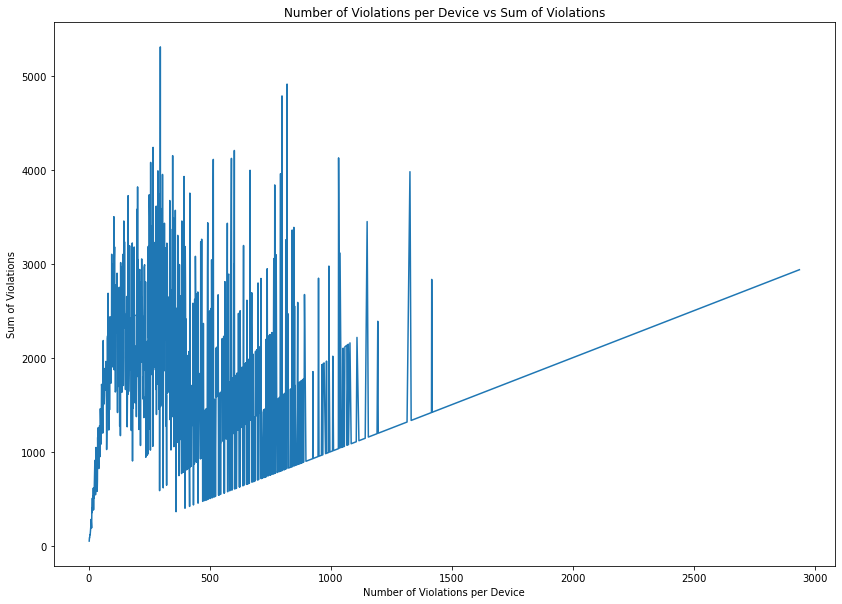

In [99]:
# If there are 5 devices committed 500 violations each, the sum of violations would be 5*500 = 2500, (500, 2500) on the graph
mask_violation = parkingDB['Violation'] == 1
df = parkingDB.loc[mask_violation, 'Device ID'].value_counts()
df_counts = df.value_counts().sort_index()
df_values = df_counts*df_counts.index
df_values.plot.line(figsize=(14, 10))
plt.title('Number of Violations per Device vs Sum of Violations')
plt.ylabel('Sum of Violations')
plt.xlabel('Number of Violations per Device')

### 2.22 Composition of All Violations by Violations per Device

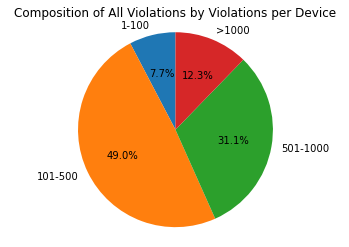

In [102]:
# 49% of all violations are committed by devices which committed 101-500 violations each
total_1_100 = df_values.loc[df_values.index <= 100].sum()
total_101_500 = df_values.loc[(101 <= df_values.index) & (df_values.index <= 500)].sum()
total_501_1000 = df_values.loc[(501 <= df_values.index) & (df_values.index <= 1000)].sum()
total_1001 = df_values.loc[1001 <= df_values.index].sum()
labels = '1-100', '101-500', '501-1000', '>1000'
sizes = [total_1_100, total_101_500, total_501_1000, total_1001]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Composition of All Violations by Violations per Device')
plt.show()

### 2.23 Departure Time Histogram

In [11]:
import datetime

In [12]:
parkingDB['groupby'] = "for group by"

Text(0.5, 0, 'Hour')

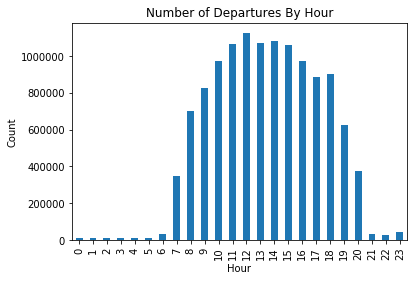

In [13]:
parkingDB['groupby'].groupby(parkingDB["Departure Time"].dt.hour).count().plot(kind="bar")
plt.title('Number of Departures By Hour')
plt.ylabel('Count')
plt.xlabel('Hour')

Text(0.5, 0, 'Hour')

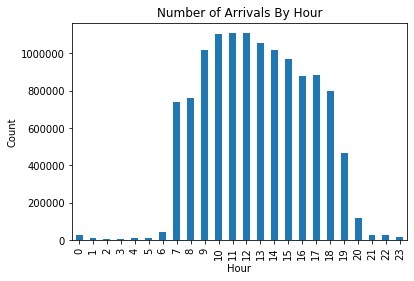

In [14]:
parkingDB['groupby'].groupby(parkingDB["Arrival Time"].dt.hour).count().plot(kind="bar")
plt.title('Number of Arrivals By Hour')
plt.ylabel('Count')
plt.xlabel('Hour')

Text(0.5, 0, 'Day')

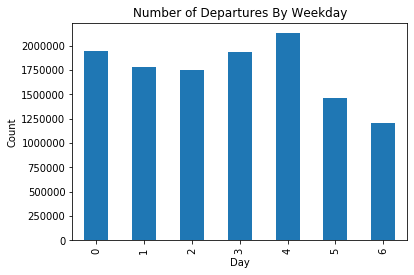

In [15]:
parkingDB['groupby'].groupby(parkingDB["Departure Time"].dt.weekday).count().plot(kind="bar")
plt.title('Number of Departures By Weekday')
plt.ylabel('Count')
plt.xlabel('Day')

Text(0.5, 0, 'Day')

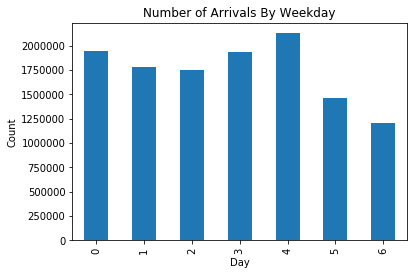

In [16]:
parkingDB['groupby'].groupby(parkingDB["Arrival Time"].dt.weekday).count().plot(kind="bar")
plt.title('Number of Arrivals By Weekday')
plt.ylabel('Count')
plt.xlabel('Day')

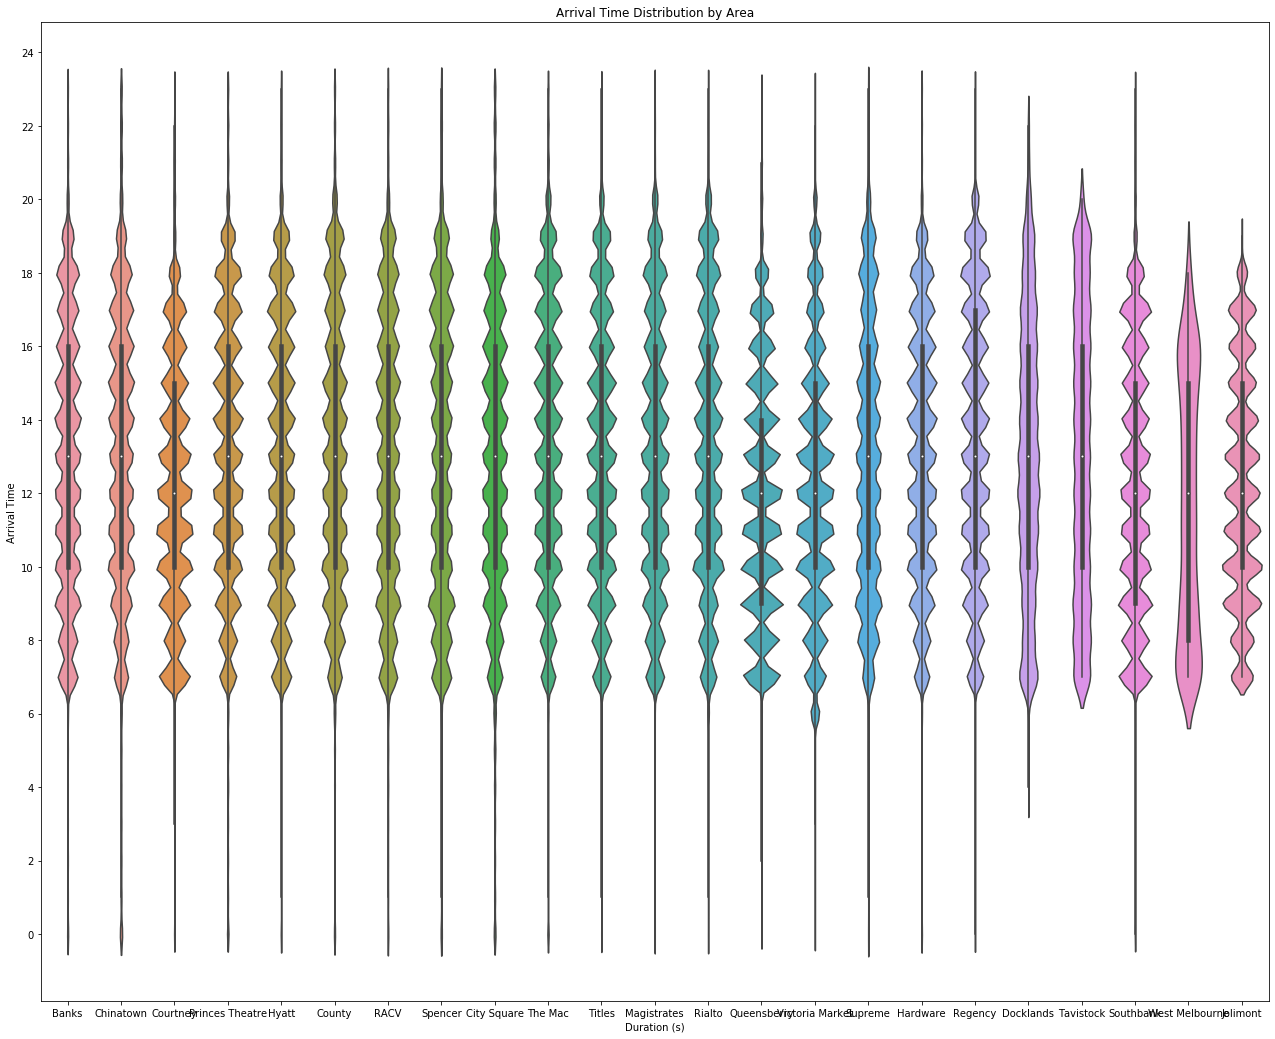

In [17]:
from matplotlib.pyplot import figure
plt.figure(figsize=(22,18))
sns.violinplot(x="Area", y=parkingDB["Arrival Time"].dt.hour, data=parkingDB)
#parkingDB.boxplot(figsize=(20, 18), column='Parking Duration (s)', by='Area', grid=True, showmeans=True)
plt.title('Arrival Time Distribution by Area')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

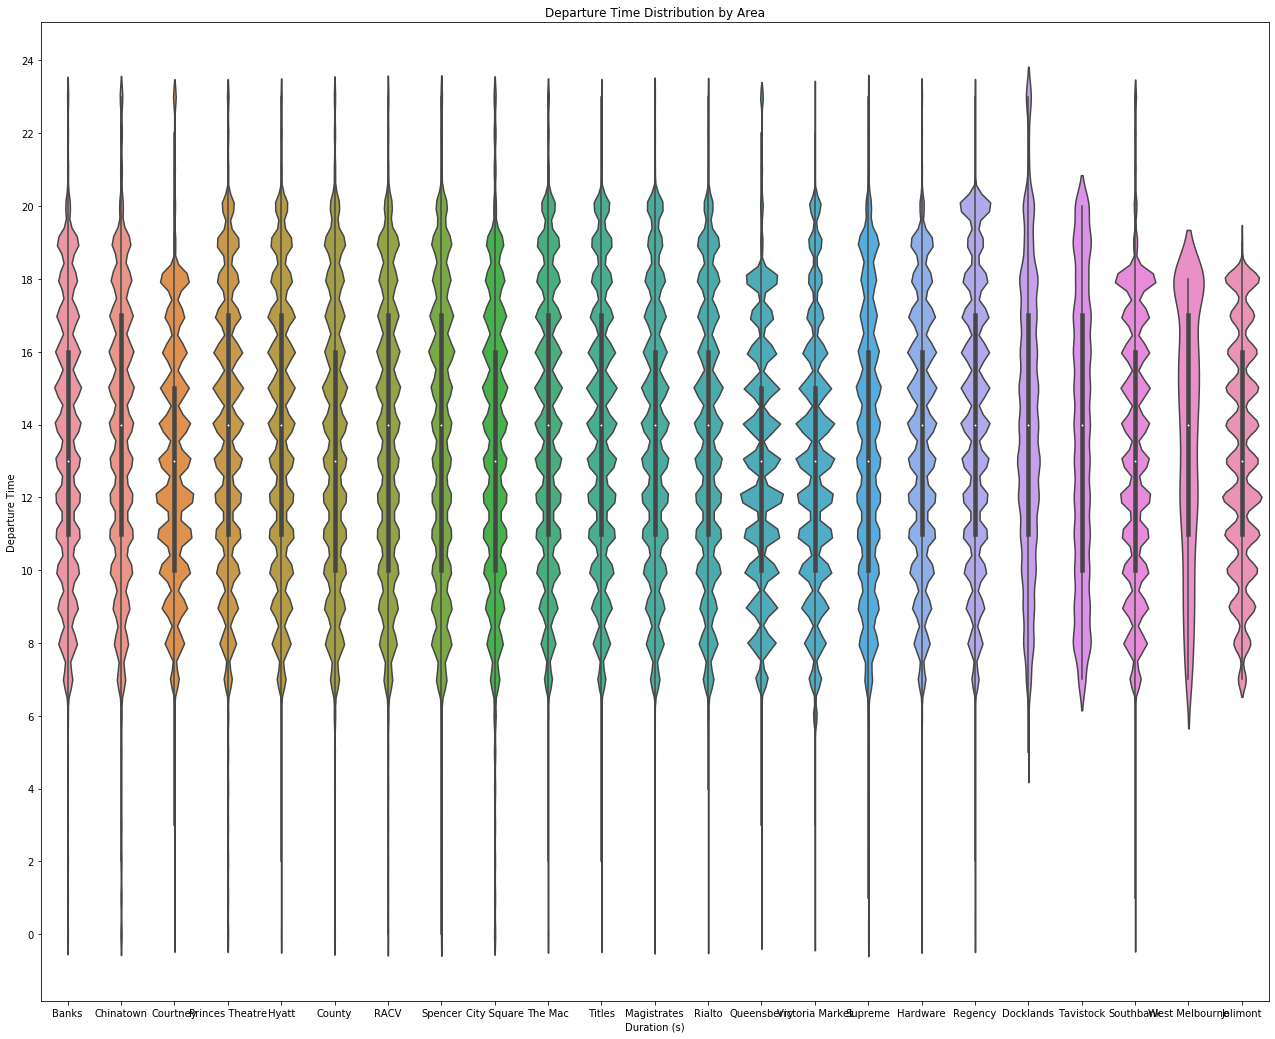

In [18]:
plt.figure(figsize=(22,18))
sns.violinplot(x="Area", y=parkingDB["Departure Time"].dt.hour, data=parkingDB)
#parkingDB.boxplot(figsize=(20, 18), column='Parking Duration (s)', by='Area', grid=True, showmeans=True)
plt.title('Departure Time Distribution by Area')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

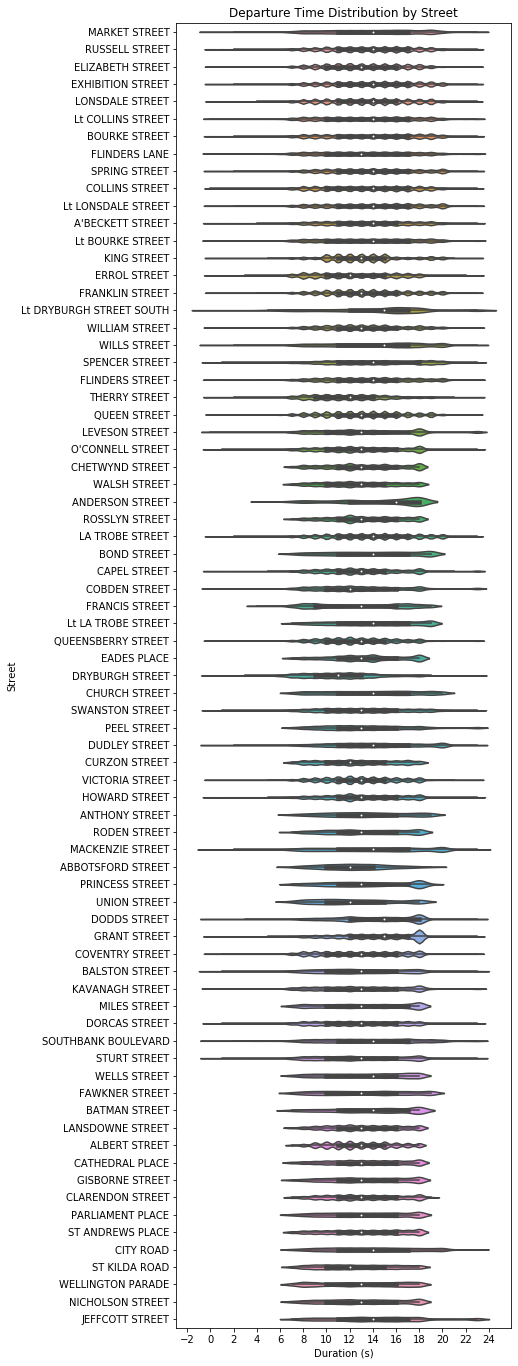

In [19]:
plt.figure(figsize=(6,24))
sns.violinplot(y="Street", x=parkingDB["Departure Time"].dt.hour, data=parkingDB, )
plt.title('Departure Time Distribution by Street')
plt.xlabel('Duration (s)')
plt.locator_params(axis="x", nbins = 24)

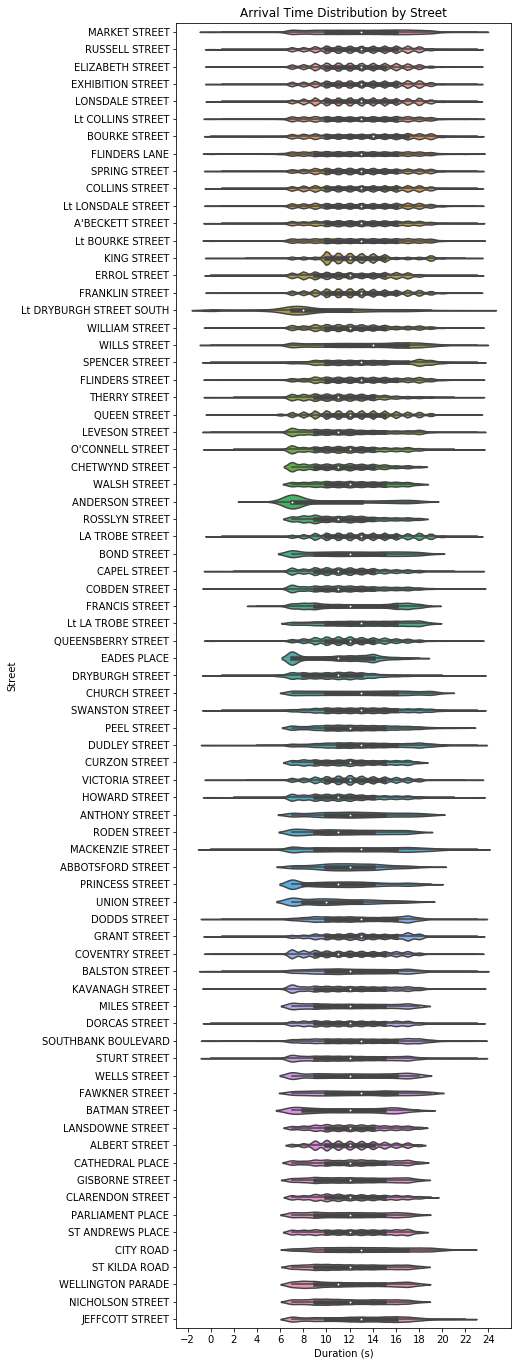

In [20]:
plt.figure(figsize=(6,24))
sns.violinplot(y="Street", x=parkingDB["Arrival Time"].dt.hour, data=parkingDB, )
plt.title('Arrival Time Distribution by Street')
plt.xlabel('Duration (s)')
plt.locator_params(axis="x", nbins = 24)

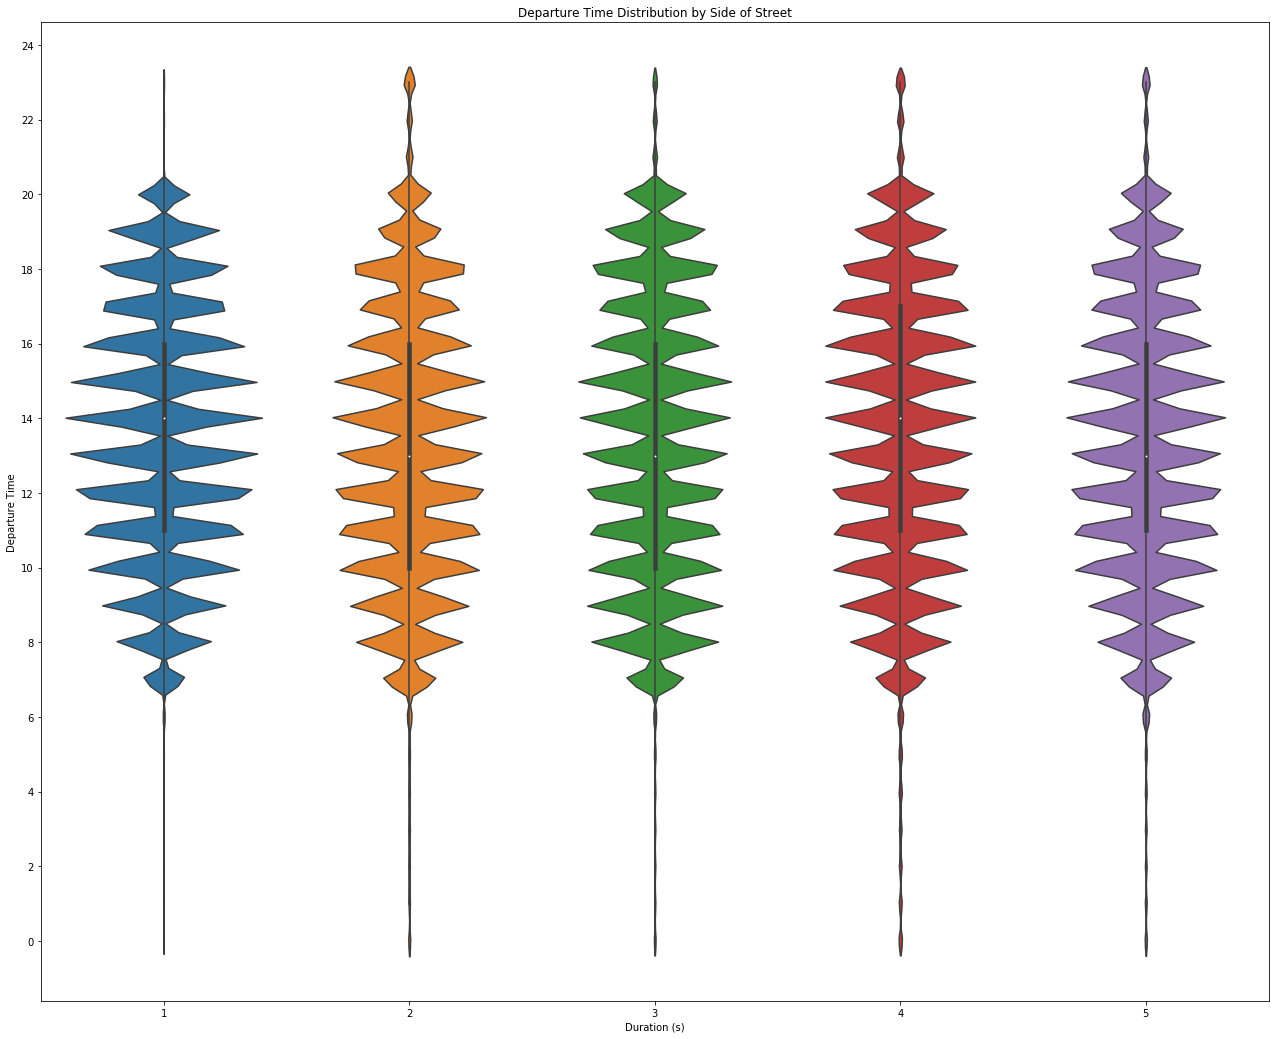

In [21]:
plt.figure(figsize=(22,18))
sns.violinplot(x="Side Of Street", y=parkingDB["Departure Time"].dt.hour, data=parkingDB)
plt.title('Departure Time Distribution by Side of Street')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

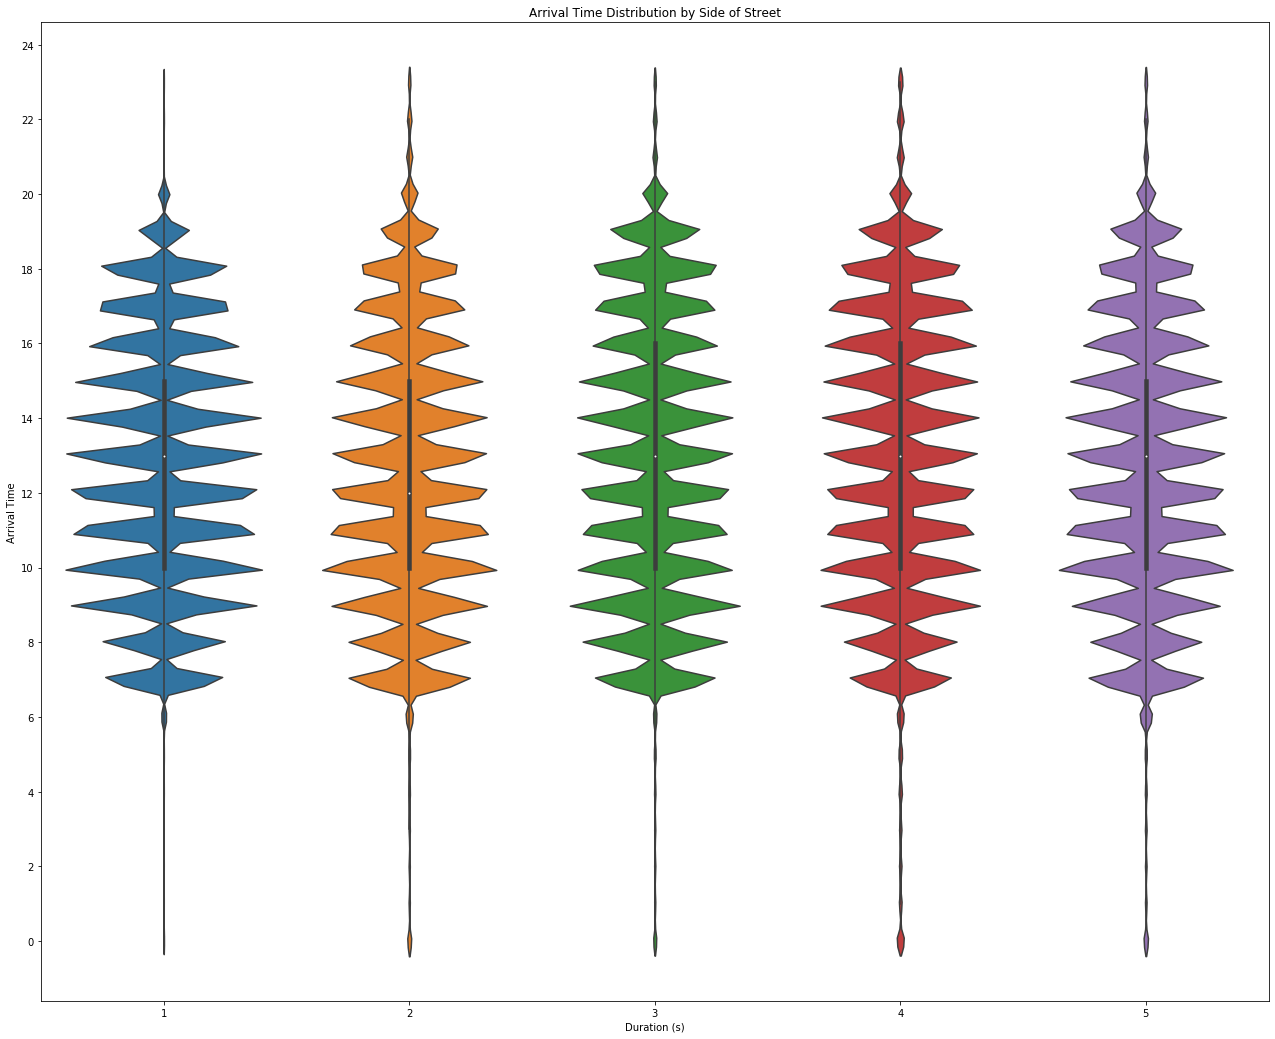

In [22]:
plt.figure(figsize=(22,18))
sns.violinplot(x="Side Of Street", y=parkingDB["Arrival Time"].dt.hour, data=parkingDB)
plt.title('Arrival Time Distribution by Side of Street')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

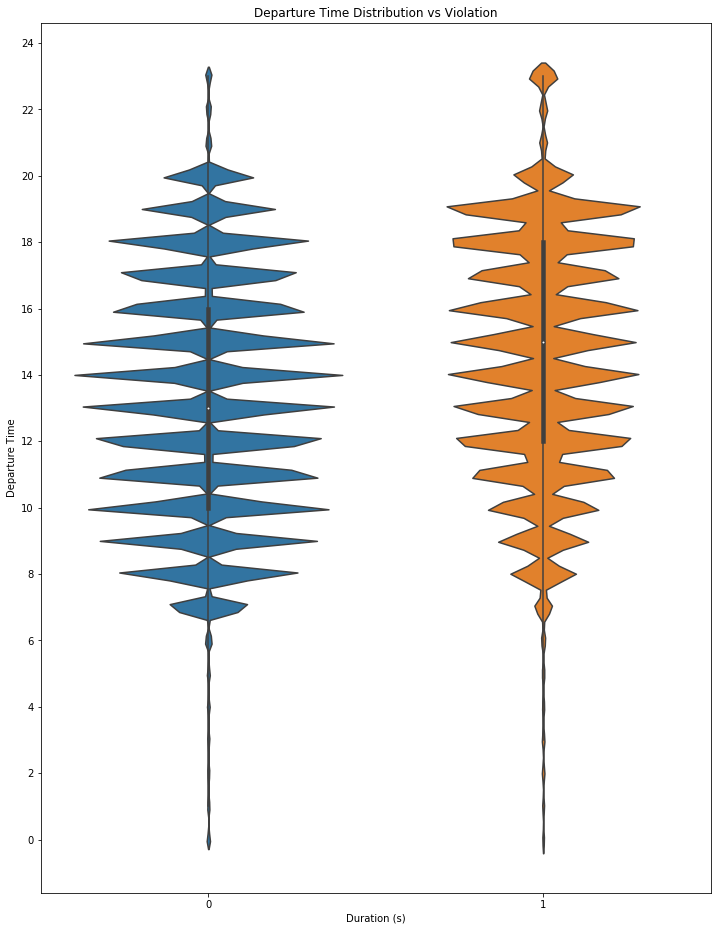

In [23]:
plt.figure(figsize=(12,16))
sns.violinplot(x="Violation", y=parkingDB["Departure Time"].dt.hour, data=parkingDB)
plt.title('Departure Time Distribution vs Violation')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

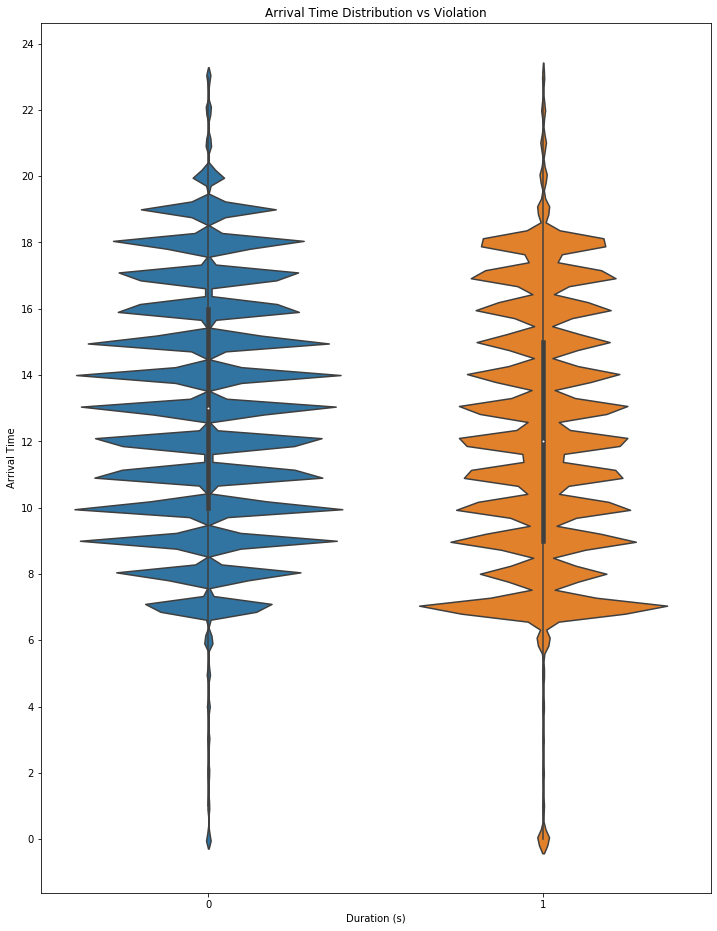

In [24]:
plt.figure(figsize=(12,16))
sns.violinplot(x="Violation", y=parkingDB["Arrival Time"].dt.hour, data=parkingDB)
plt.title('Arrival Time Distribution vs Violation')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

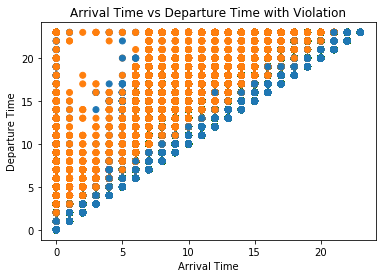

In [25]:
fig, ax = plt.subplots()
colors = {0:'tab:blue', 1:'tab:orange'}
ax.scatter(parkingDB['Arrival Time'].dt.hour, parkingDB['Departure Time'].dt.hour, c=parkingDB['Violation'].map(colors))
plt.title('Arrival Time vs Departure Time with Violation')
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')
plt.show()